In [ ]:
#imports
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12068 entries, 0 to 12067
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                12068 non-null  int64  
 1   ID_track          12068 non-null  object 
 2   Artista           12068 non-null  object 
 3   Album             12068 non-null  object 
 4   Nombre_del_track  12068 non-null  object 
 5   Popularidad       12068 non-null  int64  
 6   Duracion_en_ms    12068 non-null  int64  
 7   Explicitud        9001 non-null   object 
 8   Bailabilidad      12068 non-null  float64
 9   Energia           10064 non-null  float64
 10  Tonalidad         12068 non-null  int64  
 11  Volumen           8799 non-null   float64
 12  Modo              12068 non-null  int64  
 13  Palabrería        9886 non-null   float64
 14  Acustica          12068 non-null  float64
 15  Instrumentalidad  12068 non-null  float64
 16  En_Vivo           12068 non-null  float6

In [ ]:
data.head()

,Id,ID_track,Artista,Album,Nombre_del_track,Popularidad,Duracion_en_ms,Explicitud,Bailabilidad,Energia,...,Volumen,Modo,Palabrería,Acustica,Instrumentalidad,En_Vivo,Valencia,Tempo,Firma_de_tiempo,Genero_del_track
0,2961,2bPGTMB5sFfFYQ2YvSmup0,Rammstein,Rammstein,Deutschland,77,322339,False,0.521,0.895,...,-5.242,1,0.0442,0.000055,0.34900,0.0985,0.237,120.117,4,alt-rock
1,1685,2ZOMnAID3cCIrboS3rWhqx,BaianaSystem,BaianaSystem,Vinheta Baiana,19,82760,False,0.427,0.590,...,-12.379,0,0.0645,0.820000,0.83400,0.2410,0.722,121.578,4,afrobeat
2,106177,1rMfDvE2C8ne8UZj847rKM,ABBA,The Essential Collection,Dancing Queen,63,233440,False,0.508,0.825,...,-9.627,1,0.0451,0.175000,0.00133,0.3760,0.715,100.548,4,swedish
3,33241,1BR2rZ8nZ0pPuRkuyE3oZ2,PXNDX,Bonanza,La noche de la mesa triste,46,259946,False,0.490,0.965,...,-3.365,1,NaN,0.001560,0.00703,0.3130,0.558,92.131,4,emo
4,42182,3QIKlxgJe4exDyey5Ibjo7,Napalm Death,Enemy of the Music Business + Leaders Not Foll...,Next on the List,16,216093,False,0.257,0.997,...,-4.560,1,0.1220,0.000023,0.00371,0.2940,0.243,115.032,4,grindcore


In [ ]:
#halla la cantidad de nulos de la data
data.isnull().sum()

,0
Id,0
ID_track,0
Artista,0
Album,0
Nombre_del_track,0
Popularidad,0
Duracion_en_ms,0
Explicitud,3067
Bailabilidad,0
Energia,2004


In [ ]:
data.nunique()

,0
Id,12068
ID_track,8554
Artista,182
Album,2740
Nombre_del_track,6587
Popularidad,92
Duracion_en_ms,6340
Explicitud,2
Bailabilidad,839
Energia,1073


In [ ]:
data.head()

,Id,ID_track,Artista,Album,Nombre_del_track,Popularidad,Duracion_en_ms,Explicitud,Bailabilidad,Energia,...,Volumen,Modo,Palabrería,Acustica,Instrumentalidad,En_Vivo,Valencia,Tempo,Firma_de_tiempo,Genero_del_track
0,2961,2bPGTMB5sFfFYQ2YvSmup0,Rammstein,Rammstein,Deutschland,77,322339,False,0.521,0.895,...,-5.242,1,0.0442,0.000055,0.34900,0.0985,0.237,120.117,4,alt-rock
1,1685,2ZOMnAID3cCIrboS3rWhqx,BaianaSystem,BaianaSystem,Vinheta Baiana,19,82760,False,0.427,0.590,...,-12.379,0,0.0645,0.820000,0.83400,0.2410,0.722,121.578,4,afrobeat
2,106177,1rMfDvE2C8ne8UZj847rKM,ABBA,The Essential Collection,Dancing Queen,63,233440,False,0.508,0.825,...,-9.627,1,0.0451,0.175000,0.00133,0.3760,0.715,100.548,4,swedish
3,33241,1BR2rZ8nZ0pPuRkuyE3oZ2,PXNDX,Bonanza,La noche de la mesa triste,46,259946,False,0.490,0.965,...,-3.365,1,NaN,0.001560,0.00703,0.3130,0.558,92.131,4,emo
4,42182,3QIKlxgJe4exDyey5Ibjo7,Napalm Death,Enemy of the Music Business + Leaders Not Foll...,Next on the List,16,216093,False,0.257,0.997,...,-4.560,1,0.1220,0.000023,0.00371,0.2940,0.243,115.032,4,grindcore


#PREPROCESAMIENTO

COMPLETAR NULOS

In [ ]:
for column in data.columns:
    if data[column].isnull().sum() > 0:  # If there are missing values in the column
        if data[column].dtype == 'object':
            # Fill with mode for categorical data
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            # Fill with mean for numerical data
            data[column]  = data[column].fillna(data[column].mean())

<ipython-input-93-88603e17849a>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].fillna(data[column].mode()[0])


In [ ]:
data.isnull().sum()

,0
Id,0
ID_track,0
Artista,0
Album,0
Nombre_del_track,0
Popularidad,0
Duracion_en_ms,0
Explicitud,0
Bailabilidad,0
Energia,0


ENCODER


In [ ]:
# Step 2: Encode categorical variables
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

BOXPLOTS

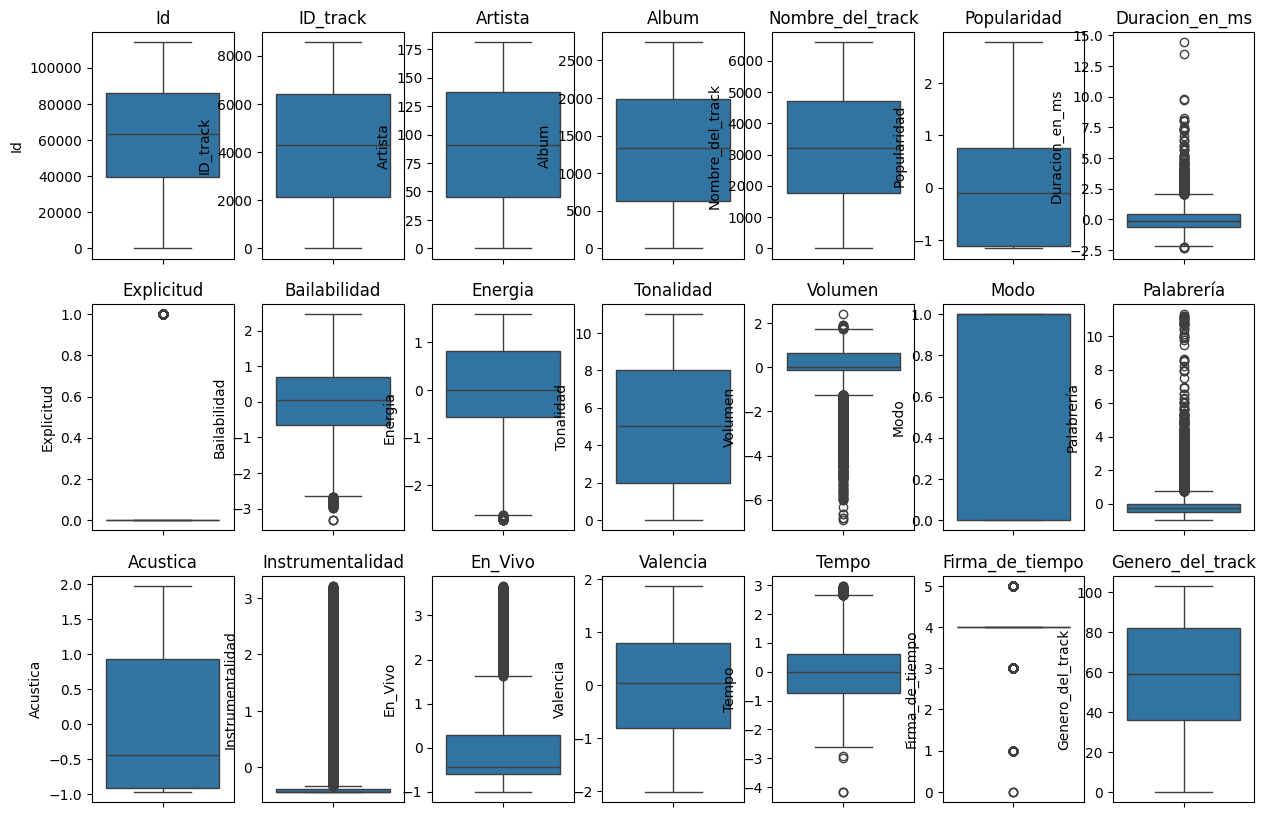

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(len(data.columns)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(data[data.columns[i]])
    plt.title(data.columns[i])


plt.show()



SCALE NUMERICAL FEATURES

In [ ]:
scaler = StandardScaler()
numerical_features = [
    'Popularidad', 'Duracion_en_ms', 'Bailabilidad', 'Energia', 'Volumen',
    'Palabrería', 'Acustica', 'Instrumentalidad', 'En_Vivo', 'Valencia', 'Tempo'
]
data[numerical_features] = scaler.fit_transform(data[numerical_features])



DROP UNNECESARY COLUMNS

In [ ]:
data.drop(columns=['Id', 'ID_track'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12068 entries, 0 to 12067
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artista           12068 non-null  int64  
 1   Album             12068 non-null  int64  
 2   Nombre_del_track  12068 non-null  int64  
 3   Popularidad       12068 non-null  float64
 4   Duracion_en_ms    12068 non-null  float64
 5   Explicitud        12068 non-null  bool   
 6   Bailabilidad      12068 non-null  float64
 7   Energia           12068 non-null  float64
 8   Tonalidad         12068 non-null  int64  
 9   Volumen           12068 non-null  float64
 10  Modo              12068 non-null  int64  
 11  Palabrería        12068 non-null  float64
 12  Acustica          12068 non-null  float64
 13  Instrumentalidad  12068 non-null  float64
 14  En_Vivo           12068 non-null  float64
 15  Valencia          12068 non-null  float64
 16  Tempo             12068 non-null  float6

BOXPLOTS

